#👓 Project on the BMW cars 🚘🚘🚐🚗 sales



What is the business/domain?  sales automobile

Who will use these insights? (Business management)

What are they trying to improve? Sale volume

# ✅Step 1


Load the dataset using pandas and store it in a variable df.
(Hint: pd.read_csv())

View the first 5 rows of the dataset to get an idea of the data.
(Hint: head())

Check the number of rows and columns (shape) in the dataset.

Get the list of all column names.

Find the data type of each column.
(Hint: dtypes or info())

Imported the imp libraries

In [1]:
import pandas as pd
import numpy as np

## 1️⃣Importing the file

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BMW_Car_Sales_Classification.csv to BMW_Car_Sales_Classification.csv


## #️⃣ Loading the file

In [3]:
df = pd.read_csv("BMW_Car_Sales_Classification.csv")

## #️⃣️ checking the file

In [ ]:
print(df.head())

      Model  Year         Region  Color Fuel_Type Transmission  Engine_Size_L  \
0  5 Series  2016           Asia    Red    Petrol       Manual            3.5   
1        i8  2013  North America    Red    Hybrid    Automatic            1.6   
2  5 Series  2022  North America   Blue    Petrol    Automatic            4.5   
3        X3  2024    Middle East   Blue    Petrol    Automatic            1.7   
4  7 Series  2020  South America  Black    Diesel       Manual            2.1   

   Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
0      151748      98740          8300                 High  
1      121671      79219          3428                  Low  
2       10991     113265          6994                  Low  
3       27255      60971          4047                  Low  
4      122131      49898          3080                  Low  


### #️⃣ Get the shape of the dataset (rows, columns)

In [ ]:
print(df.shape) # rows number, column numbers

(50000, 11)


### #️⃣ basic information about columns, data types, and null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


### #️⃣️  columns

In [ ]:
df.columns

Index(['Model', 'Year', 'Region', 'Color', 'Fuel_Type', 'Transmission',
       'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume',
       'Sales_Classification'],
      dtype='object')

### #️⃣ ️   Details

In [ ]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


### #️⃣Checking missing values it checks null values in each columns

In [ ]:
df.isnull().sum() #  if found null it sums those up

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


### #️⃣️  checking the duplicate rows if any

In [ ]:
df[df.duplicated()]

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification


If dupliactes found

In [ ]:
df.duplicated().sum()

np.int64(0)

## ✅No Dupliactes found

### Hypothetically if duplicates were found

dropping the duplicates

In [ ]:
df = df.drop_duplicates()

### Check where values are blank ('') or whitespace-only

In [6]:
df_blnk = df.applymap(lambda X : isinstance(X, str) and X.strip() == "")
df_blnk.sum()

/tmp/ipython-input-6-2825036524.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_blnk = df.applymap(lambda X : isinstance(X, str) and X.strip() == "")


,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


### so NO blank or whitespaces in between

## 2️⃣ Check Data Integrity


Price" should not be negative, "Year" should be in a reasonable range, etc

### #️⃣Checking if price is negative

In [ ]:
df[df["Price_USD"] < 0].sum() # no negative values

,0
Model,0
Year,0
Region,0
Color,0
Fuel_Type,0
Transmission,0
Engine_Size_L,0.0
Mileage_KM,0
Price_USD,0
Sales_Volume,0


### #️⃣Checking if years are in range

In [ ]:
df["Year"].min(), df["Year"].max() # so year are also in reasonable range

(2010, 2024)

In [ ]:
invalid_years = df[(df["Year"] < 1980) | (df["Year"] > 2025)]
print(invalid_years)

Empty DataFrame
Columns: [Model, Year, Region, Color, Fuel_Type, Transmission, Engine_Size_L, Mileage_KM, Price_USD, Sales_Volume, Sales_Classification]
Index: []


### #️⃣checking unique years, cars, etc

nunique() directly gives the count of unique values in the column.
To get unique years in ascending order, you can use either sorted() or numpy.sort().

In [ ]:
sorted_years = sorted(df["Year"].unique().tolist())
print(sorted_years)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [ ]:
sorted(df["Model"].unique().tolist())

['3 Series',
 '5 Series',
 '7 Series',
 'M3',
 'M5',
 'X1',
 'X3',
 'X5',
 'X6',
 'i3',
 'i8']

using numpy

In [ ]:
df_sorted_years = np.sort(df["Year"].unique())
print(df_sorted_years)

[2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023
 2024]


using pandas

In [ ]:
df_sorted = df['Year'].dropna().sort_values().unique()
print(df_sorted)

15


count how many unique years are there

In [ ]:
df_sorted = df['Year'].dropna().sort_values().nunique()
print(df_sorted)

15


So we have the data of 15 years

# 🔆✔Exploring data

In [ ]:
df["Price_USD"].max()

119998

In [ ]:
df["Price_USD"].min()

30000

so the maximumand minimum  values are 120k and 30k

# ✅✅✅Data cheking and cleaning is done there have been no duplicates and null value data is clean and ready for generating insights

In [ ]:
df["Year"].value_counts()

,count
Year,
2022,3478
2024,3427
2019,3392
2021,3372
2016,3365
2015,3358
2014,3350
2012,3332
2010,3330


# ✅STEP 2

## 🔆 INSIGHTS GENERATION

### 1️⃣ Basic Statistical Insights

In [ ]:
print("Average Price", df["Price_USD"].mean())
print("Minimum Price", df["Price_USD"].min())
print("Maximum Price", df["Price_USD"].max())

Average Price 75034.6009
Minimum Price 30000
Maximum Price 119998


### 🚗🚗🚗 # Top 5 most common car models

In [ ]:
df["Model"].value_counts().head(5)

,count
Model,
7 Series,4666
i3,4618
i8,4606
3 Series,4595
5 Series,4592


#7-series-exterior-right-front-three-quarter-3.avif
##🔎 insight 7 series is most sold car all years compared

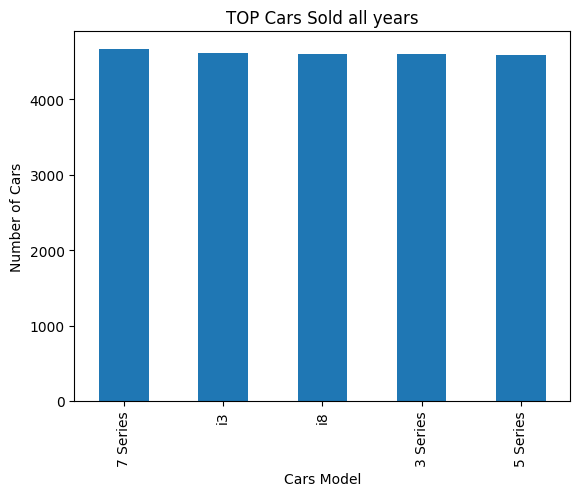

In [ ]:
import matplotlib.pyplot as plt
df["Model"].value_counts().head(5).plot(kind="bar")
plt.title("TOP Cars Sold all years")
plt.xlabel("Cars Model")
plt.ylabel("Number of Cars")

plt.show()

### ✏️ As the data is of 15 years it is only suitable to derive the insights based on only top years recently so deriving insights based on recent top years

## 🎯Top Years

In [ ]:
df['Year'].value_counts().head(3)

,count
Year,
2022,3478
2024,3427
2019,3392


## ✏️2022, 2024 and 2019 are the years in which most of the sales happened
## so we will consider these years for our analysis

In [ ]:
top_years = ( df.groupby('Year')['Sales_Volume'].sum().nlargest(3).index)
Top_years_df = df[df['Year'].isin(top_years)]
print(Top_years_df)

          Model  Year         Region   Color Fuel_Type Transmission  \
2      5 Series  2022  North America    Blue    Petrol    Automatic   
3            X3  2024    Middle East    Blue    Petrol    Automatic   
6            i8  2022         Europe   White    Diesel       Manual   
9            i8  2019         Europe   White  Electric       Manual   
32           M5  2019           Asia     Red    Diesel       Manual   
...         ...   ...            ...     ...       ...          ...   
49980        i3  2022           Asia   White    Hybrid    Automatic   
49982        M3  2024           Asia  Silver    Hybrid    Automatic   
49983  3 Series  2019  South America  Silver    Hybrid    Automatic   
49984  5 Series  2019  North America   White    Diesel       Manual   
49991        X5  2019           Asia   White    Diesel    Automatic   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
2                4.5       10991     113265          6994         

## 🎯 Tops Models sold based on sales valume

In [ ]:
top_models_each_year = (Top_years_df.groupby(['Year', 'Model'])['Sales_Volume']
                        .sum().reset_index()
                        .sort_values(['Year', 'Sales_Volume'], ascending=[True, False]))


top_models_each_year = top_models_each_year.groupby('Year').head(3)
print(top_models_each_year)

    Year     Model  Sales_Volume
5   2019        X1       1681721
7   2019        X5       1670497
4   2019        M5       1664560
18  2022        X5       1796846
13  2022  7 Series       1739216
19  2022        X6       1701699
30  2024        X6       1836396
23  2024  5 Series       1711580
24  2024  7 Series       1686209


## 📈 PLOT

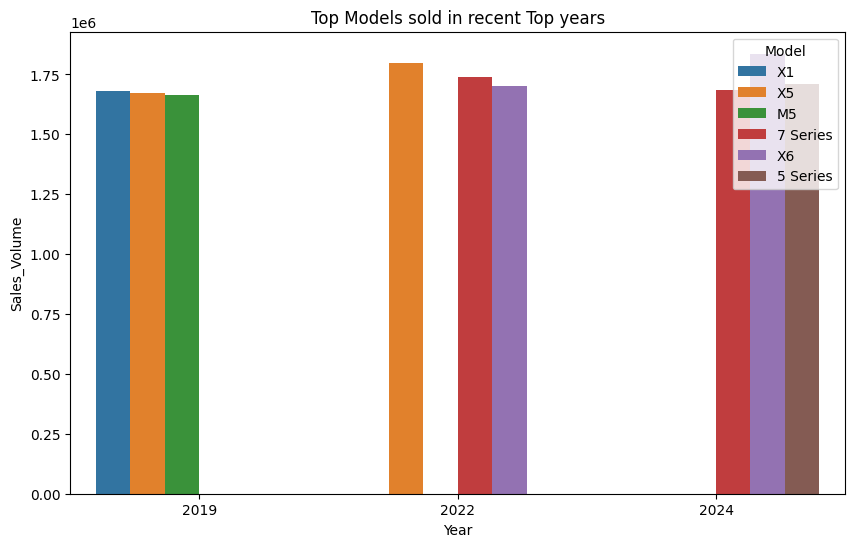

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=top_models_each_year, x='Year', y='Sales_Volume', hue='Model')
plt.title('Top Models sold in recent Top years')
plt.show()

## ✏️INSIGHT: as

in 2019 X1, M5, X5

in 2022 7 series, X5, X6 series

in 2024 7 series, X6, 5 series

### Xseries cars are popular throught all the years

### ✏️ Based on Fuel_Type by Sales Volume

In [ ]:
top_models_each_year = (Top_years_df.groupby(['Year', 'Fuel_Type'])['Sales_Volume']
                        .sum().reset_index()
                        .sort_values(['Year', 'Sales_Volume'], ascending=[True, False]))


top_models_each_year2 = top_models_each_year.groupby('Year').head(3)
print(top_models_each_year2)

    Year Fuel_Type  Sales_Volume
2   2019    Hybrid       4461759
3   2019    Petrol       4446063
1   2019  Electric       4184558
6   2022    Hybrid       4687463
4   2022    Diesel       4474126
5   2022  Electric       4383912
10  2024    Hybrid       4647195
8   2024    Diesel       4356475
9   2024  Electric       4290700


### 🚒 Plot

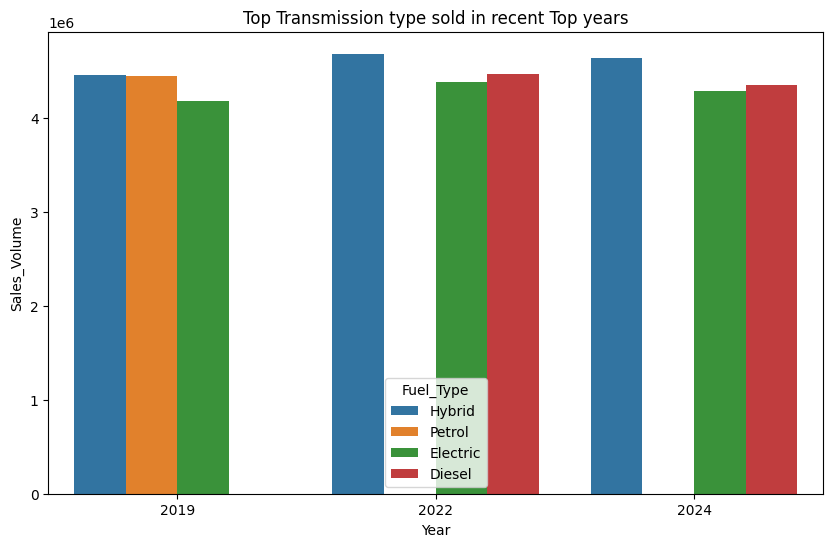

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_models_each_year2, x='Year', y='Sales_Volume', hue='Fuel_Type')
plt.title('Top Transmission type sold in recent Top years')
plt.show()

In recent years its seen that hybrid models are getting more popularirty

### 2️⃣ Yearly Trends

How many cars are sold per year?

In [ ]:
Cars_Per_year = df["Year"].value_counts()
print(Cars_Per_year) # highest selling years

Year
2022    3478
2024    3427
2019    3392
2021    3372
2016    3365
2015    3358
2014    3350
2012    3332
2010    3330
2013    3326
2017    3290
2018    3278
2011    3278
2023    3219
2020    3205
Name: count, dtype: int64


## 📌 Top most years

In [ ]:
df_cars_top_year = df["Year"].value_counts().sort_values(ascending=False).head(5)
df_cars_top_year.columns = ["Year",  "Salescount" ]
print(df_cars_top_year)

Year
2022    3478
2024    3427
2019    3392
2021    3372
2016    3365
Name: count, dtype: int64


### 📊📉 PLOT Yearly trend

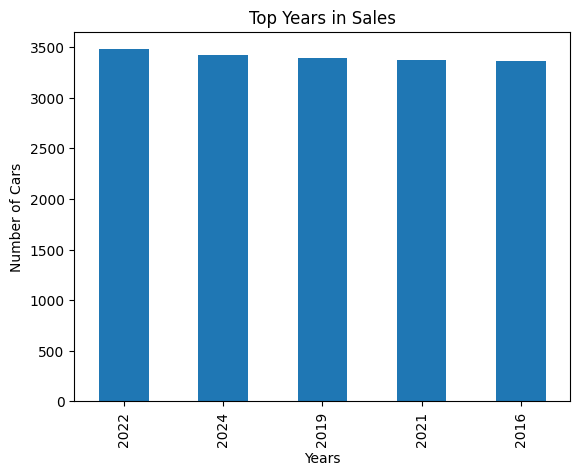

In [ ]:
df["Year"].value_counts().head(5).plot(kind="bar")
plt.title("Top Years in Sales")
plt.xlabel("Years")
plt.ylabel("Number of Cars")


plt.show()

#✅2022 WAS THE YEAR IN WHICH NUMBERS OF CARS SOLD ARE HIGHER

### 3️⃣ Category-Wise Analysis

###💲💲💲💱 Average price per fuel type:

In [ ]:
df.groupby("Fuel_Type")["Price_USD"].mean()

,Price_USD
Fuel_Type,
Diesel,75079.809671
Electric,75276.313207
Hybrid,74797.551746
Petrol,74990.419841


## 📉Plotting

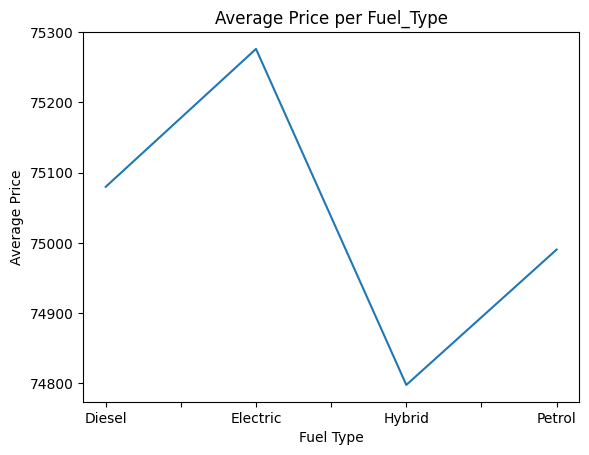

In [ ]:
Fuel_Classify = df.groupby("Fuel_Type")["Price_USD"].mean().plot(kind="line")
plt.title("Average Price per Fuel_Type")
plt.xlabel("Fuel Type")

plt.ylabel("Average Price")
plt.show()

### 🚘🚘♻⚡ Electric vehicles are in trends in recent years

### Number of cars by transmission type:

In [ ]:
 df["Transmission"].value_counts()

,count
Transmission,
Manual,25154
Automatic,24846


### 📈 PLOT Transmission types

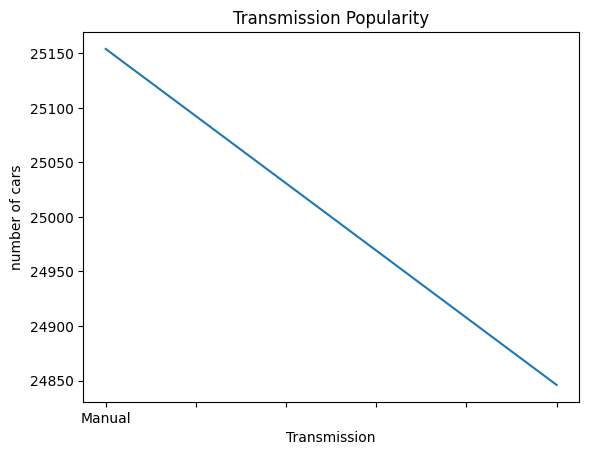

In [ ]:
df["Transmission"].value_counts().plot(kind='line')
plt.title("Transmission Popularity")
plt.xlabel("Transmission")
plt.ylabel("number of cars")
plt.show()


### Overall Manual transmission types have been mostly sold

### 4️⃣ Price Distribution
Identify price range using percentiles:

In [ ]:
print(df["Price_USD"].quantile([0.25, 0.50, 0.75]))

0.25    52434.75
0.50    75011.50
0.75    97628.25
Name: Price_USD, dtype: float64


#📈📉📊 Plots

In [ ]:
import matplotlib.pyplot as plt

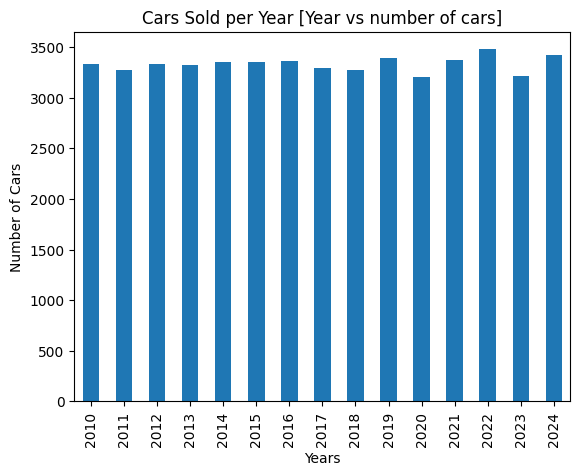

In [ ]:
df["Year"].value_counts().sort_index().plot(kind="bar")
plt.title("Cars Sold per Year [Year vs number of cars]")
plt.xlabel("Years")
plt.ylabel("Number of Cars")

plt.show()

### 📊Price distribution (histogram).

In [ ]:
import seaborn as sns

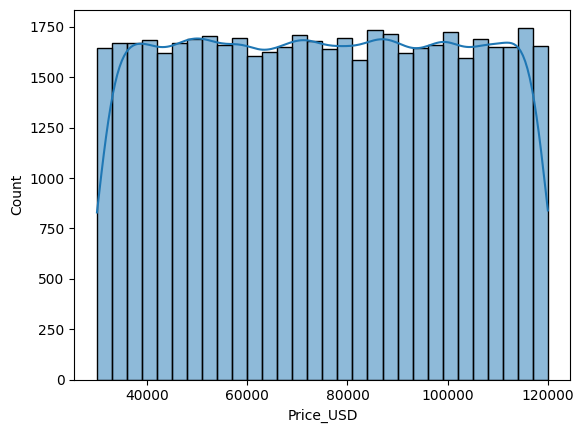

In [ ]:
sns.histplot(df['Price_USD'], bins=30, kde=True)
plt.show()

## 🖼✈🌄🌅⛺🌁Area Region wise Anlaysis

In [ ]:
df.groupby('Region')["Sales_Volume"].sum().sort_values(ascending=False)

,Sales_Volume
Region,
Asia,42974277
Europe,42555138
North America,42402629
Middle East,42326620
Africa,41565252
South America,41551818


Highest sales occur in Asia

TOP 3 Regions are

ASIA

Europe

North America

Lets see which car model is popular in each Top  region

In [ ]:
Top_Region = (df.groupby('Region')['Sales_Volume'].sum().nlargest(3).index)
Top_Region_df = df[df["Region"].isin(Top_Region)]

Top_model_Region = Top_Region_df.groupby(['Region', 'Model'])['Sales_Volume'].sum().reset_index().sort_values(['Region','Sales_Volume'], ascending=[True, False])


Top_Model_Region2 = Top_model_Region.groupby('Region').head(3)
print(Top_Model_Region2)

           Region     Model  Sales_Volume
5            Asia        X1       4192289
2            Asia  7 Series       4004066
10           Asia        i8       3975942
21         Europe        i8       4202401
15         Europe        M5       4002667
11         Europe  3 Series       3959930
24  North America  7 Series       4087259
28  North America        X3       4056192
32  North America        i8       3987274


## 📊📉Plots for Top Regions

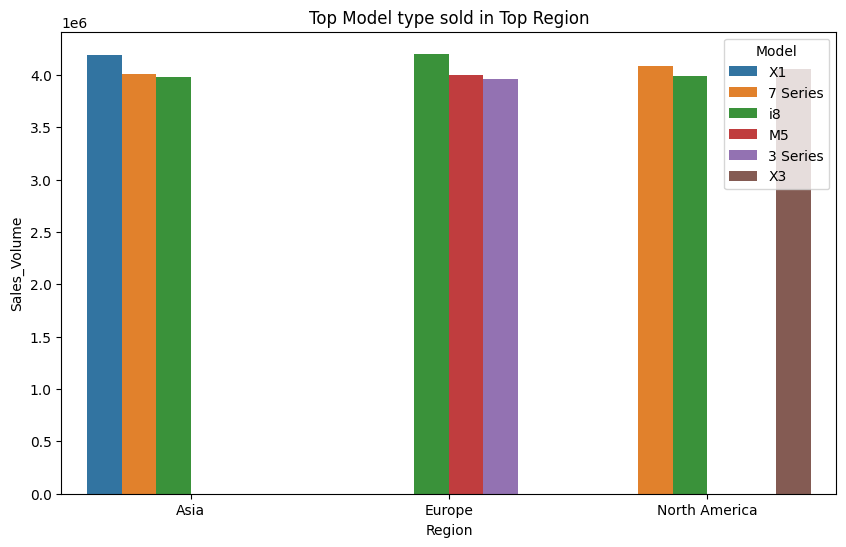

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=Top_Model_Region2, x='Region', y='Sales_Volume', hue='Model')
plt.title('Top Model type sold in Top Region')
plt.show()

IN ASIA:  Xl Model is on top


IN Europe: i8 Model is on top

IN North Amrica: 7 Series is more Popelar

This insight is more valueable because marketing team can focus narketing these top models, further researching why are these models so popular in these region so as to help compare it with law sales and hence improve it.

## 🔴🟠🟡🟢⚪⚫ Color influences sales

In [ ]:
df["Color"].unique()

array(['Red', 'Blue', 'Black', 'Silver', 'White', 'Grey'], dtype=object)

In [ ]:
df.groupby('Color')["Sales_Volume"].sum().sort_values(ascending=False)

,Sales_Volume
Color,
Red,42750183
Silver,42674022
White,42272954
Grey,41995141
Blue,41972741
Black,41710693


### So Overall Red colour cars are more popular now lets check is the same trend going on in recent top years or changed

In [ ]:
Top_Years = df.groupby("Year")["Sales_Volume"].sum().sort_values(ascending=False).head(3).index

Top_Years_data = df[df['Year'].isin(Top_Years)]
print(Top_Years_data)

          Model  Year         Region   Color Fuel_Type Transmission  \
2      5 Series  2022  North America    Blue    Petrol    Automatic   
3            X3  2024    Middle East    Blue    Petrol    Automatic   
6            i8  2022         Europe   White    Diesel       Manual   
9            i8  2019         Europe   White  Electric       Manual   
32           M5  2019           Asia     Red    Diesel       Manual   
...         ...   ...            ...     ...       ...          ...   
49980        i3  2022           Asia   White    Hybrid    Automatic   
49982        M3  2024           Asia  Silver    Hybrid    Automatic   
49983  3 Series  2019  South America  Silver    Hybrid    Automatic   
49984  5 Series  2019  North America   White    Diesel       Manual   
49991        X5  2019           Asia   White    Diesel    Automatic   

       Engine_Size_L  Mileage_KM  Price_USD  Sales_Volume Sales_Classification  
2                4.5       10991     113265          6994         

In [ ]:
Top_color_each_year = Top_Years_data.groupby(["Year","Color"])["Sales_Volume"].sum().reset_index().sort_values(["Year","Sales_Volume"],ascending=[True, False])

print(Top_color_each_year)

    Year   Color  Sales_Volume
5   2019   White       2934017
3   2019     Red       2922186
4   2019  Silver       2920241
0   2019   Black       2900447
1   2019    Blue       2877348
2   2019    Grey       2637717
8   2022    Grey       3070587
9   2022     Red       3039601
11  2022   White       3009960
7   2022    Blue       2962268
10  2022  Silver       2926976
6   2022   Black       2911554
13  2024    Blue       3048927
16  2024  Silver       3009765
12  2024   Black       2979077
15  2024     Red       2861725
14  2024    Grey       2824876
17  2024   White       2803484


### 📊📉📈 PLOTS

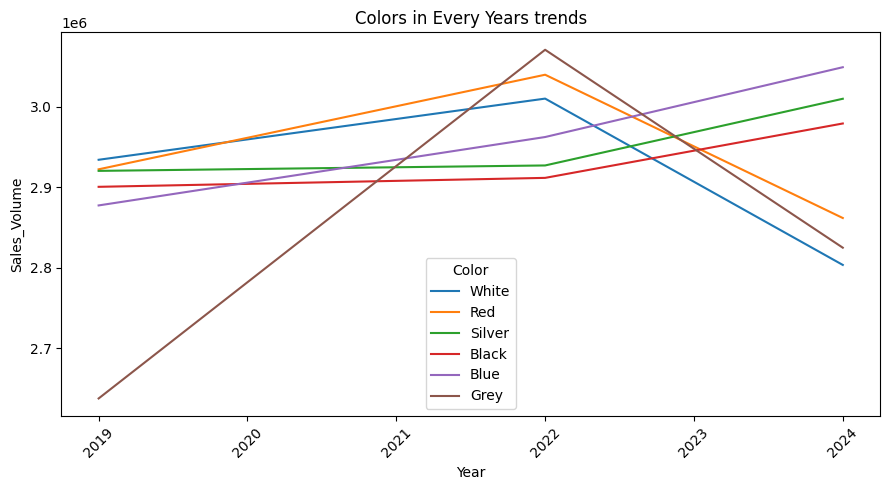

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(9, 5))
sns.lineplot(data=Top_color_each_year, x='Year',y='Sales_Volume', hue='Color')
plt.title("Colors in Every Years trends")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### In recent years blue, black and silver colour gained popularity where as red colour showed dip in sales volume, so marketting team can focus on these colors for high selling